In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from statsmodels.tsa.stattools import acf
import tensorflow as tf
import torch
from tensorflow.keras.models import load_model
from scipy.signal import find_peaks

In [4]:
# Load trained generator
generator = tf.keras.models.load_model("../saved_models/generator_final.keras")

In [5]:
# Define your condition: [fc, amp, is_qpo]
condition = np.array([[0.3, 0.8, 1]])  # shape (1, 3)

# Generate random latent noise
latent_dim = 100
z = np.random.normal(0, 1, (1, latent_dim))  # shape (1, 100)

# Pass inputs separately, not concatenated
generated_series = generator.predict([z, condition])  # shape (1, 512, 1)

# Flatten to 1D for plotting or analysis
generated_series = generated_series[0].flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 975ms/step


In [6]:


def analyze_gan_generated_qpo(series, expected_fc=None, fs=1, label='GAN Output'):
    # Time array
    t = np.arange(0, len(series)) / fs

    # Fourier transform and power spectrum
    fft_vals = np.fft.rfft(series)
    freqs = np.fft.rfftfreq(len(series), 1/fs)
    power = (2.0 / len(series)) * np.abs(fft_vals)**2

    # Peak detection
    peaks, _ = find_peaks(power, height=np.mean(power) * 2)

    # Autocorrelation
    lag_values = np.arange(0, 200)
    acf_vals = acf(series, nlags=199, fft=True)

    # Plotting
    plt.figure(figsize=(12, 6))

    # PSD
    plt.subplot(2, 1, 1)
    plt.plot(freqs, power, label="Power Spectrum", color='darkblue')
    plt.scatter(freqs[peaks], power[peaks], color='red', label="Detected Peaks")
    if expected_fc:
        plt.axvline(expected_fc, linestyle='--', color='black', label=f"Expected QPO = {expected_fc:.2f} Hz")
    plt.xscale("log")
    plt.yscale("log")
    max_power = np.max(power)
    plt.ylim(max_power * 1e-4, max_power * 1.2)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power Spectral Density")
    plt.title(f"PSD of {label}")
    plt.grid(True, which='both', linestyle='--', alpha=0.5)
    plt.legend()

    # ACF
    plt.subplot(2, 1, 2)
    plt.plot(lag_values, acf_vals, color='green', label="Autocorrelation")
    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel("Lag")
    plt.ylabel("Autocorrelation")
    plt.title("ACF")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print summary
    print("Detected QPO peaks (Hz):", freqs[peaks])
    if expected_fc:
        close_peaks = [f for f in freqs[peaks] if np.isclose(f, expected_fc, atol=0.02)]
        if close_peaks:
            print(f"✔ QPO detected near {expected_fc:.2f} Hz: {close_peaks}")
        else:
            print(f"✘ No peak detected near expected QPO frequency: {expected_fc:.2f} Hz")


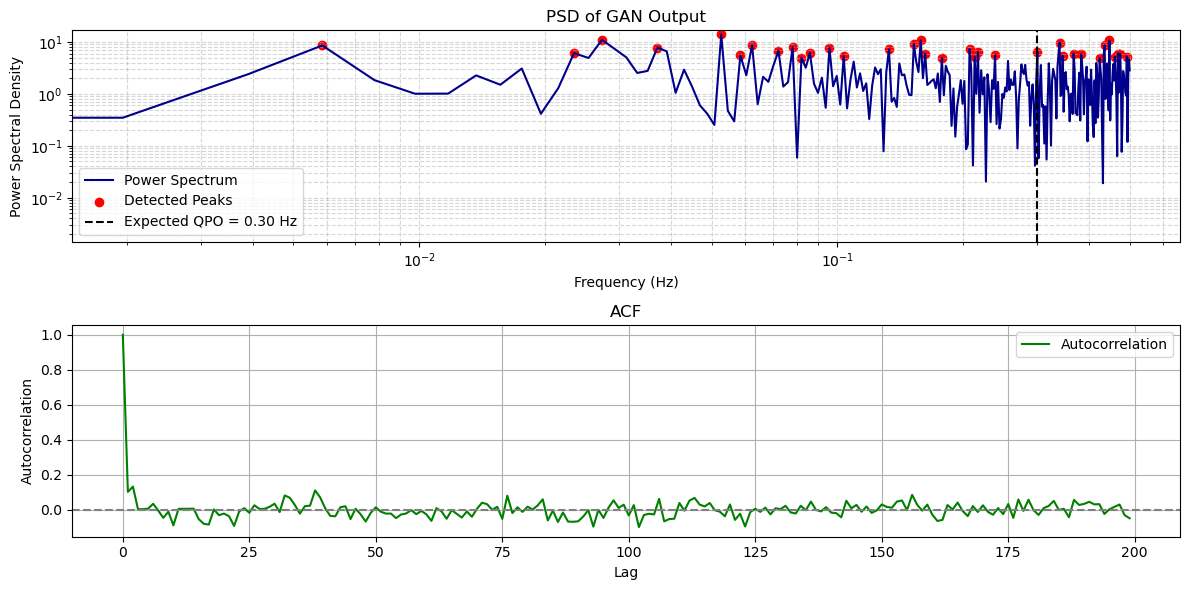

Detected QPO peaks (Hz): [0.00585938 0.0234375  0.02734375 0.03710938 0.05273438 0.05859375
 0.0625     0.07226562 0.078125   0.08203125 0.0859375  0.09570312
 0.10351562 0.1328125  0.15234375 0.15820312 0.16210938 0.17773438
 0.20703125 0.21289062 0.21679688 0.23828125 0.30078125 0.33984375
 0.34570312 0.3671875  0.3828125  0.42382812 0.43554688 0.44726562
 0.4609375  0.46875    0.47460938 0.4921875 ]
✔ QPO detected near 0.30 Hz: [0.30078125]


In [7]:
analyze_gan_generated_qpo(generated_series, expected_fc=0.3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 983ms/step


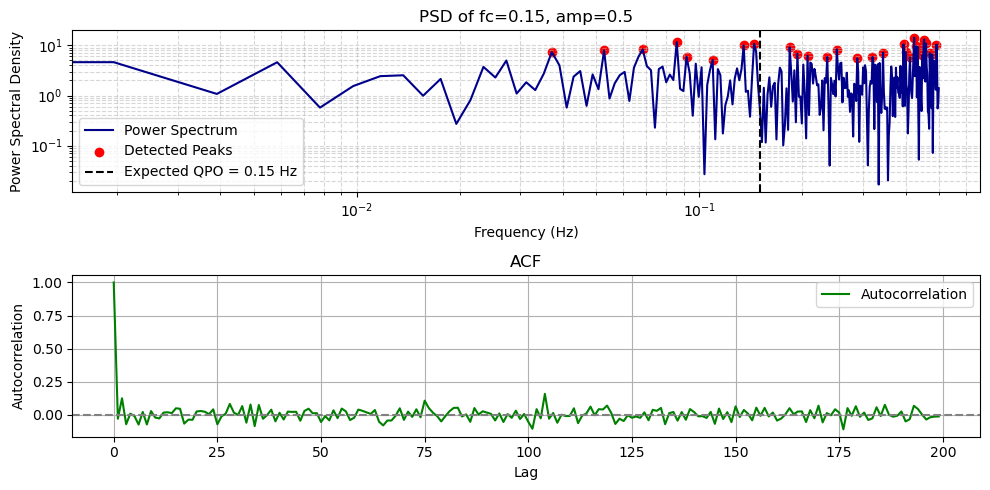

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


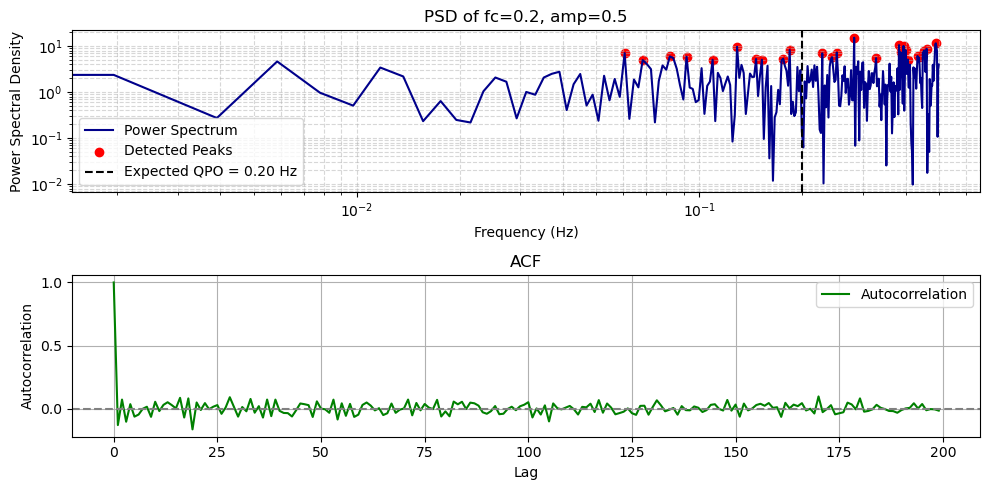

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


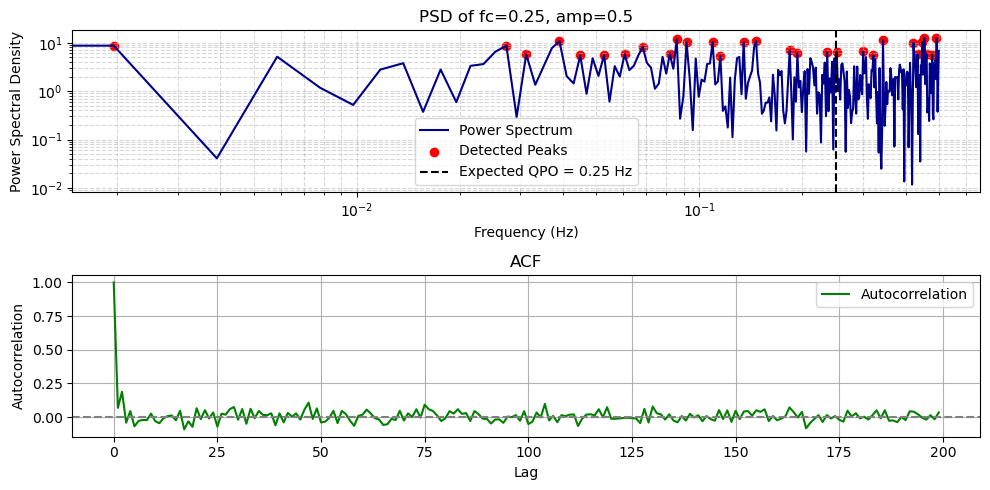

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


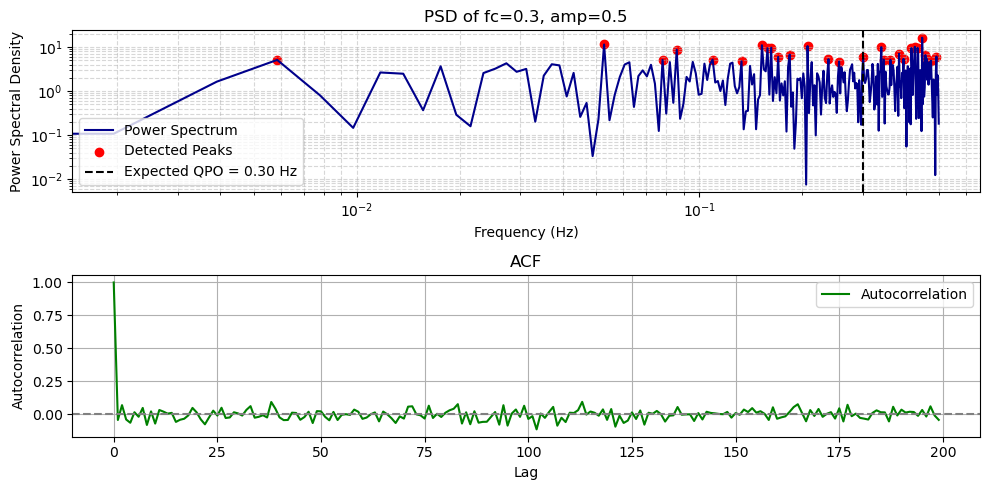

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, find_peaks
from statsmodels.tsa.stattools import acf
import tensorflow as tf

# Load the trained generator model
generator = tf.keras.models.load_model(
    "../saved_models/generator_final.keras")
latent_dim = 100

# Set of test conditions
conditions = [
    [0.15, 0.5, 1],
    [0.2, 0.5, 1],
    [0.25, 0.5, 1],
    [0.3, 0.5, 1],
]


def analyze_gan_generated_qpo(series, expected_fc=None, fs=1, label='GAN Output'):
    t = np.arange(0, len(series)) / fs
    fft_vals = np.fft.rfft(series)
    freqs = np.fft.rfftfreq(len(series), 1/fs)
    power = (2.0 / len(series)) * np.abs(fft_vals)**2
    peaks, _ = find_peaks(power, height=np.mean(power) * 2)
    lag_values = np.arange(0, 200)
    acf_vals = acf(series, nlags=199, fft=True)

    fig, axs = plt.subplots(2, 1, figsize=(10, 5))

    axs[0].plot(freqs, power, label="Power Spectrum", color='darkblue')
    axs[0].scatter(freqs[peaks], power[peaks],
                   color='red', label="Detected Peaks")
    if expected_fc:
        axs[0].axvline(expected_fc, linestyle='--', color='black',
                       label=f"Expected QPO = {expected_fc:.2f} Hz")
    axs[0].set_xscale("log")
    axs[0].set_yscale("log")
    axs[0].set_xlabel("Frequency (Hz)")
    axs[0].set_ylabel("Power Spectral Density")
    axs[0].set_title(f"PSD of {label}")
    axs[0].grid(True, which='both', linestyle='--', alpha=0.5)
    axs[0].legend()

    axs[1].plot(lag_values, acf_vals, color='green', label="Autocorrelation")
    axs[1].axhline(0, color='gray', linestyle='--')
    axs[1].set_xlabel("Lag")
    axs[1].set_ylabel("Autocorrelation")
    axs[1].set_title("ACF")
    axs[1].grid(True)
    axs[1].legend()

    plt.tight_layout()
    plt.savefig(f"qpo_plot_fc_{expected_fc}.png", dpi=300)
    plt.show()


# Generate and analyze multiple light curves
for cond in conditions:
    z = np.random.normal(0, 1, (1, latent_dim))
    condition = np.array([cond])
    generated_series = generator.predict([z, condition])[0].flatten()
    analyze_gan_generated_qpo(
        generated_series, expected_fc=cond[0], label=f"fc={cond[0]}, amp={cond[1]}")
    